data

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) #conver the data to tensor

test = datasets.MNIST("", train = False, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) #conver the data to tensor


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True) # 10 items at a time
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [ ]:
for data in trainset:
  print(data)
  break;

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
'''
data[i][j] here, when i = 0 it will be the images 
of digits n and when i = 1 then it will show the 
target (for example digit n). j is the row number.
'''
x , y = data[0][0], data[1][0]
print(y)

tensor(9)


In [ ]:
x.shape

torch.Size([1, 28, 28])

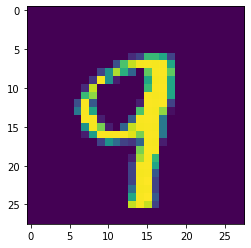

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28, 28)) # reshaping the x's shape

In [ ]:
total = 0

counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, Ys = data  # 10 imgs will go to Xs and those 10 img's targets will go to Ys
  for y in Ys:
    counter_dict[int(y)] += 1
    total += 1


In [ ]:
'''
Output will show number of target's 
percentage in total training set
'''
for i in counter_dict:
  print(f'{i}: {(counter_dict[i]/total)*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Build neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
class Network(nn.Module):

  def __init__(self):
    super().__init__()
    # making fully connected (fc) layers with 28*28 (flattened) as input and 64 nurons as output
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  # this method defines how the data flow through our network
  def forward(self, x):
    # f.relu is an activation function
    x = f.relu(self.fc1(x)) 
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)

    # softmax is for 10 class
    return f.log_softmax(x, dim = 1)


net = Network()
print(net)

Network(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) # -1 means any size. prepared for any no. of data to be passed through
X.shape

torch.Size([1, 784])

In [ ]:
output = net(X)
output

tensor([[-2.3979, -2.2912, -2.1823, -2.2660, -2.3779, -2.2227, -2.4728, -2.2357,
         -2.2646, -2.3513]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
## TRAINING LOOP

import torch.optim as opt

optimizer = opt.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3      # 3 whole passes through our entire dataset

for epoch in range(EPOCHS):
  for data in trainset:
    # data is batch of featuresets and labels
    X, y = data
    net.zero_grad() # use it if you have low graded cpu and gpu but you want good result on your batch result
    output = net(X.view(-1, 28*28))
    loss = f.nll_loss(output, y)  # use MSE if you have one-hot vector labels otherwise use nll_loss if you have scaler labels

    '''
    once you call loss.backward(), all it does is compute gradient of loss with respect to all the parameters in. 
    After computing the gradients for all tensors in the model, calling optimizer.step() 
    makes the optimizer iterate over all parameters (tensors) it is 
    supposed to update and use their internally stored grad to update their values
    '''

    loss.backward()
    optimizer.step()
  print(loss)



tensor(0.0327, grad_fn=<NllLossBackward>)
tensor(0.0137, grad_fn=<NllLossBackward>)
tensor(0.0908, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0

# we are not counting our gradient. we just wanna know how is the network at this point
# we validating our data here. so we dont want the gradient to be calculated
# here, we just wanna see how right or wrong is our model

with torch.no_grad(): 
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = f.nll_loss(output, y)

    # nn outputs are argmax but labels were scaler
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))



Accuracy:  0.981


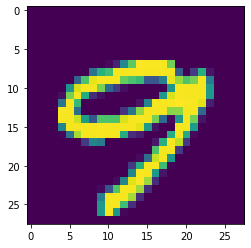

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[0].view(-1, 28*28))))

tensor(9)


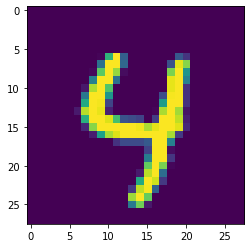

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[1].view(-1, 28*28))))

tensor(4)


In [ ]:
# there is a library called "ignite" that makes the training loops easier